<a id="Header"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          Boston House Price Prediction
</p>
</div>

<p style="text-align:center">
    <img src="https://theeconreviewdotcom.files.wordpress.com/2021/04/home-prices-705x439-1.jpg" width="350" alt="House"  />
    </a>
</p>

House price prediction can help the developer determine the selling price of a house and can help the customer to arrange the right time to purchase a house.

<a id="Table"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color: #e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          Table of Contents
</p>
</div>


* [1. **Introduction**](#1)
    * [1.1 Importing Libraries](#1.1)
    * [1.2 Loading Data](#1.2)
    * [1.3 Problems](#1.3)
    
    
* [2. **Exploratory Data Analysis**](#2)
    * [2.1 Overview](#2.1)
    * [2.2 Univariate Analysis](#2.2)
    * [2.3 Bivariate analysis](#2.3)
    
    
* [3. **Model Selection**](#3)
    * [3.1 Linear Regression](#3.1)
    * [3.2 Ridge Regression](#3.2)
    * [3.3 Lasso Regression](#3.3)
    * [3.4 Elastic Net Regression](#3.4)
    * [3.5 Decision Tree Regression](#3.5)
    * [3.6 Random Forest Regression](#3.6)
    * [3.7 Support Vector Regression](#3.7)
    * [3.8 XG Boost Regression](#3.8)
    * [3.9 Comparision](#3.9)
    
    

* [4. **Model Evaluation**](#4)


* [5. **Hyperparameter Tuning**](#5)


* [6. **Final Model**](#6)


* [7. **References**](#7)

<a id="1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          1.Introduction
</p>
</div>

[Return Table of Contents](#Table)

### About Dataset
**Content**
> The Boston Housing Dataset is a derived from information collected by the Boston Standard Metropolitan Statistical Area (SMSA) concerning housing in the area of Boston MA in 1970.  

**Description**

|No.|Column Name|Description|
|---|---|---|
|01|CRIM|per capita crime rate by town|
|02|ZN|proportion of residential land zoned for lots over 25,000 sq.ft|
|03|INDUS|proportion of non-retail business acres per town|
|04|CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|05|NOX|nitric oxides concentration (parts per 10 million)|
|06|RM|average number of rooms per dwelling|
|07|AGE|proportion of owner-occupied units built prior to 1940|
|08|DIS|weighted distances to five Boston employment centres|
|09|RAD|index of accessibility to radial highways|
|10|TAX|full-value property-tax rate per 10,000 USD|
|11|PTRATIO|pupil-teacher ratio by town|
|12|B| = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|13|LSTAT|% lower status of the population|
|14|PRICE|Median value of owner-occupied homes in $1000's|

<a id="1.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          1.1 Importing Libraries 
</p>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('rocket_r')
sns.color_palette('rocket_r')

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

<a id="1.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          1.2 Loading Data
</p>
</div>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

import warnings
warnings.filterwarnings('ignore')

C:\Users\thung\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [3]:
df = pd.DataFrame(boston.data)
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [4]:
df.columns = boston.feature_names
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
df['PRICE'] = boston.target 

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   ptratio       b  lstat  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

<a id="1.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
         1.3 Problems
</p>
</div>

Define columns:
* **Target**: `price`
* **Features**: Remaining Columns

Problems:
* Regression Algorithm Problem
* Select the best model to predict House price
* Analyze features importance to House price

<a id="2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          2. Exploratory Data Analysis
</p>
</div>

[Return Table of Contents](#Table)

<a id="2.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    2.1 Overview
</p>
</div>

**Dataset Information**

In [8]:
display(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(506, 14)

None

In [9]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

> Based on mean & interquatile range (IQR), most of columns are skewed.

In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

> * 506 rows & 14 columns
> * All columns don't contain null value.

**Checking duplicates**

In [11]:
df.duplicated().sum()

0

> * None duplicated row

<a id="2.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    2.2 Univariate Analysis
</p>
</div>

## Features

**Features Distribution**

In [12]:
features = df.drop(columns = 'price').columns
print(features)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


Text(0.5, 0.98, 'Visualizing features')

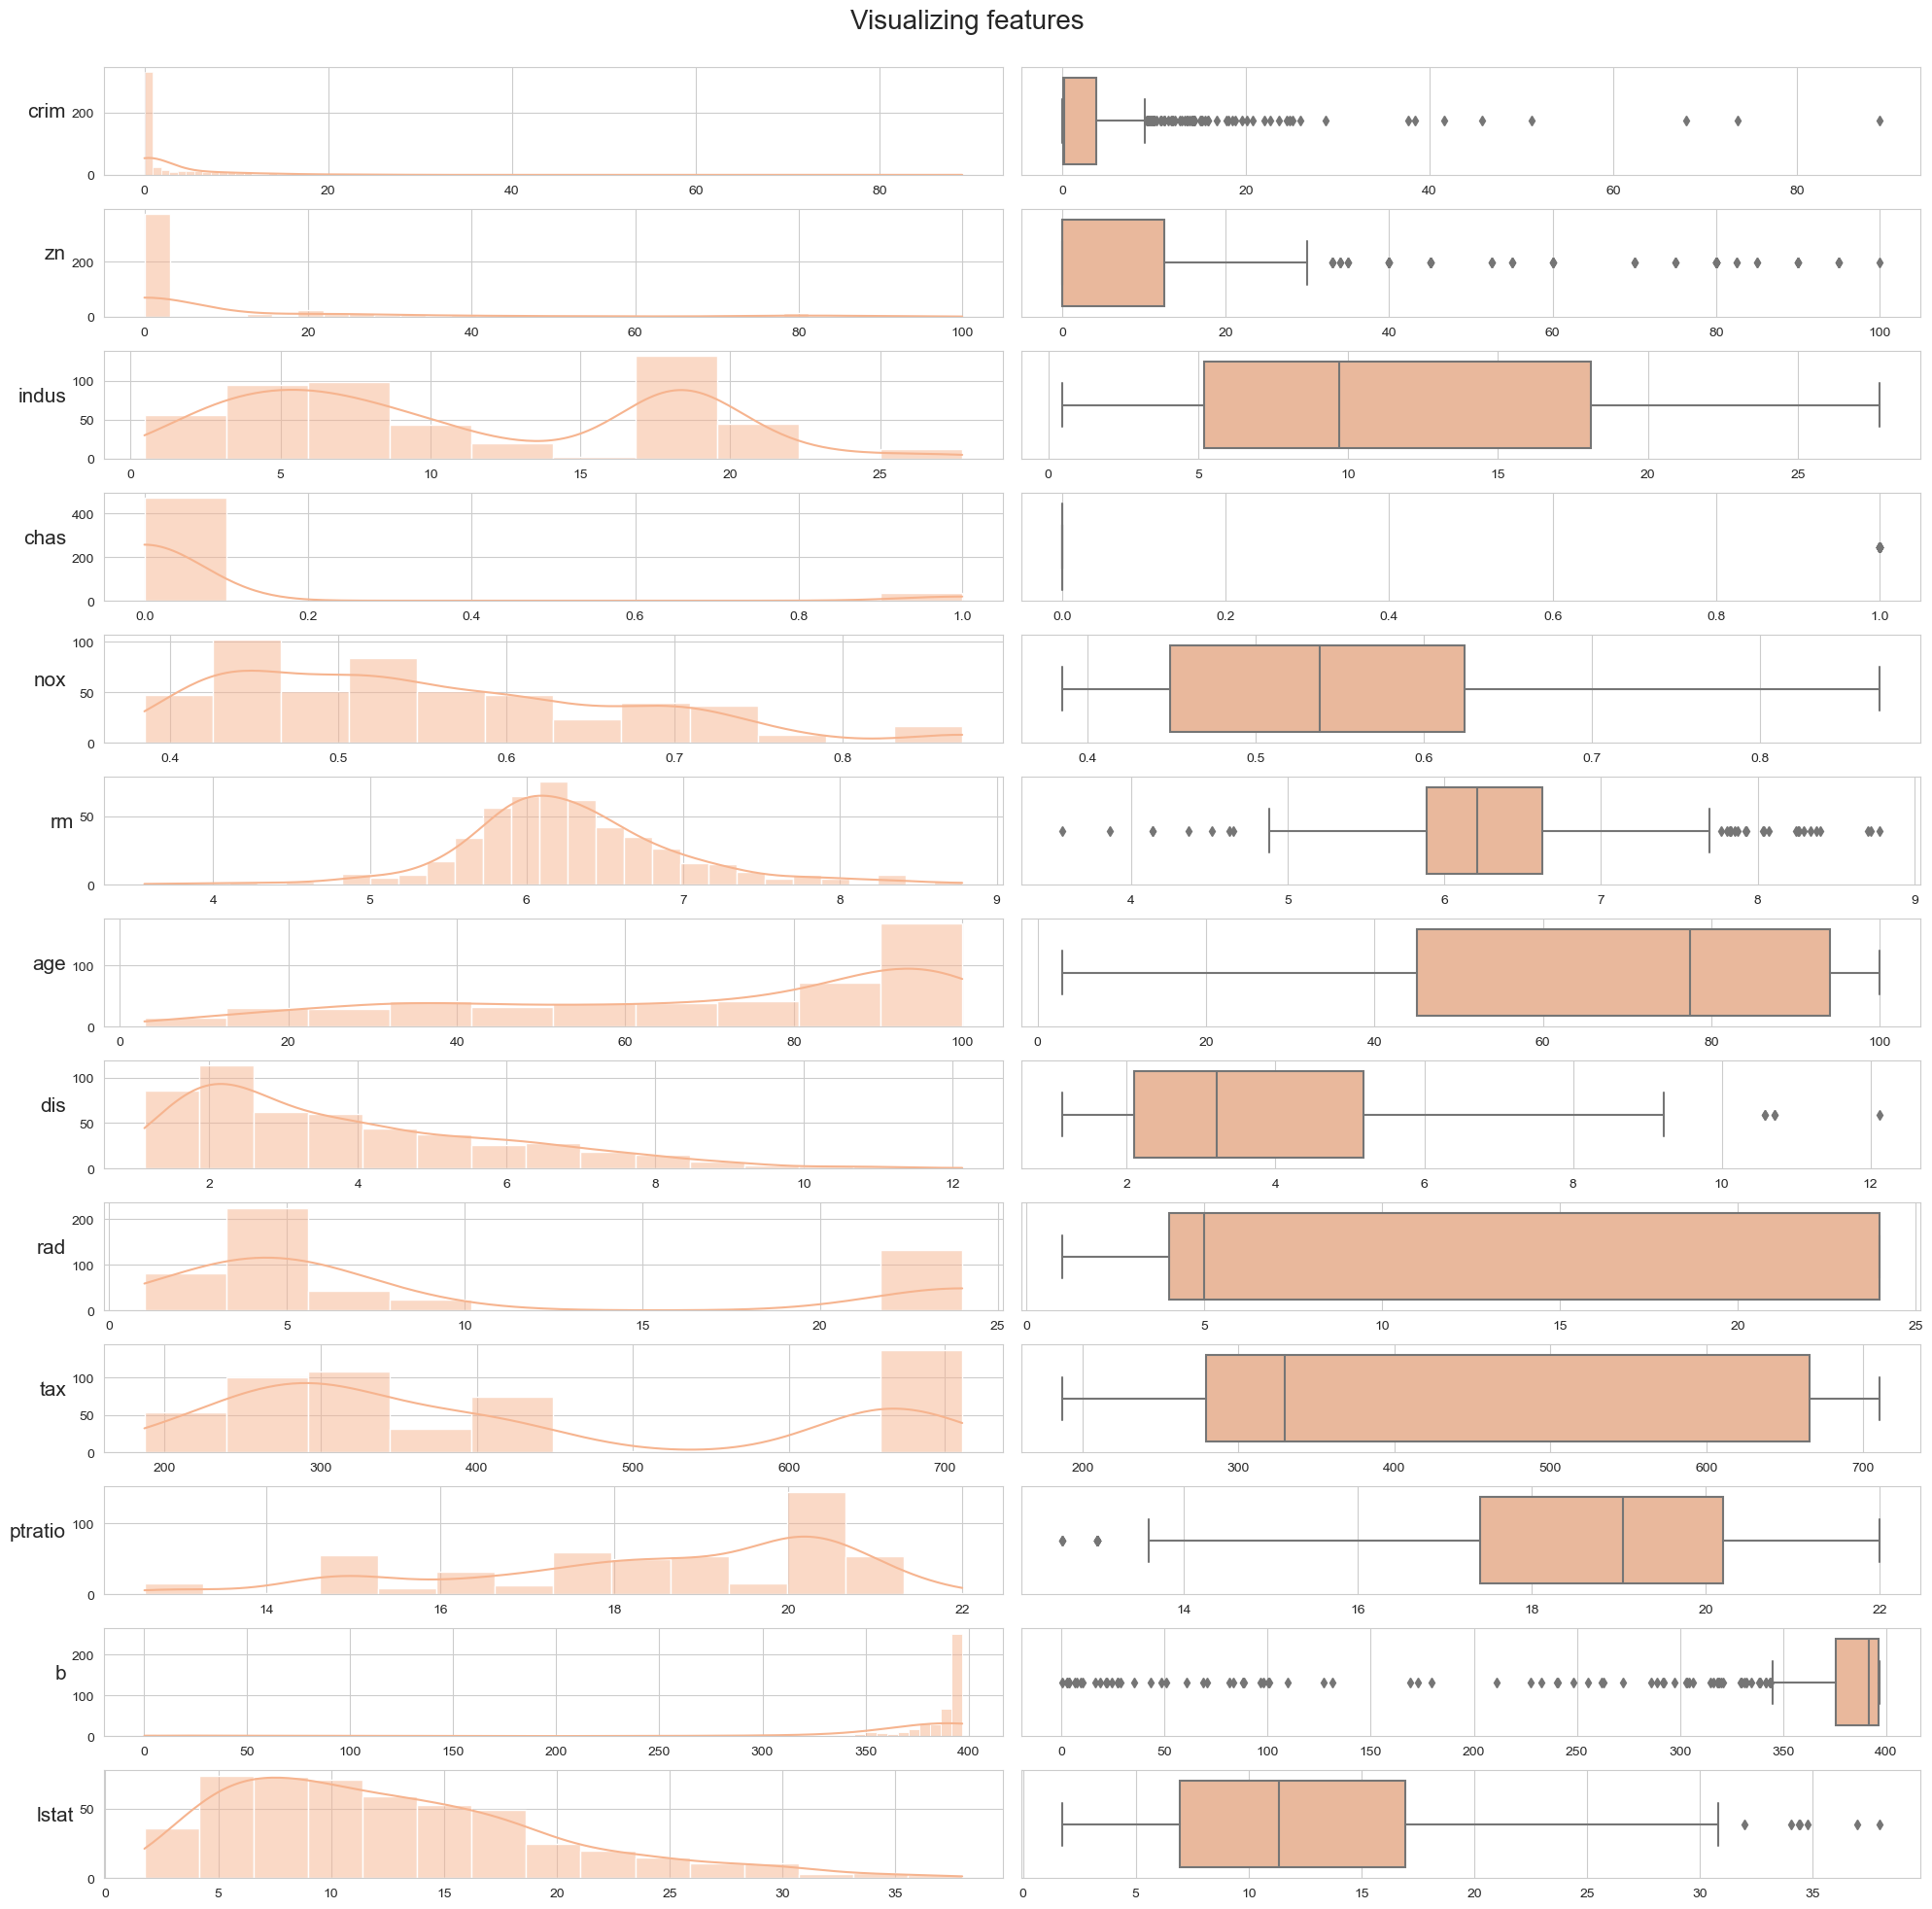

In [13]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(len(features), 2, figsize = (20, 20))

for index, i in enumerate(features):
    sns.histplot((df[i]), ax = ax[index, 0], kde = True)
    sns.boxplot((df[i]), ax = ax[index, 1])
    ax[index, 0].set_ylabel(i, fontsize = 15, rotation = 'horizontal', ha = 'right')
    ax[index, 0].set(xlabel = None)
    ax[index, 1].set(xlabel = None)

fig.tight_layout()

fig.subplots_adjust(top = 0.95)
plt.suptitle('Visualizing features', fontsize = 20)

> After analyzing these graphs, the following hypotheses can be made:
> * Most features **nearly distributed normally**.
> * There are **outliers** in **crim, zn, rm, b**. Therefore, percentage of outliers per column is calculated.

*Checking outliers in percentage of each feature*

In [14]:
p = []
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    p.append(round(perc, 2))
    
ser = pd.Series(p, index = df.columns).sort_values(ascending = False)
print(ser)

chas       100.00
b           15.22
zn          13.44
crim        13.04
price        7.91
rm           5.93
ptratio      2.96
lstat        1.38
dis          0.99
indus        0.00
nox          0.00
age          0.00
rad          0.00
tax          0.00
dtype: float64


> * Because **chas** is discrete variable so when computing outlier percetage, it is 100%. Therefore, it is unreliable. 
> * Percent of outliers per number of observations isn't too high. So it isn't removed.

**Features Normalization**

In [15]:
df1 = df.copy()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in features:
    df1[i] = scaler.fit_transform(df1[[i]])

Text(0.5, 0.98, 'Visualizing features after normalization')

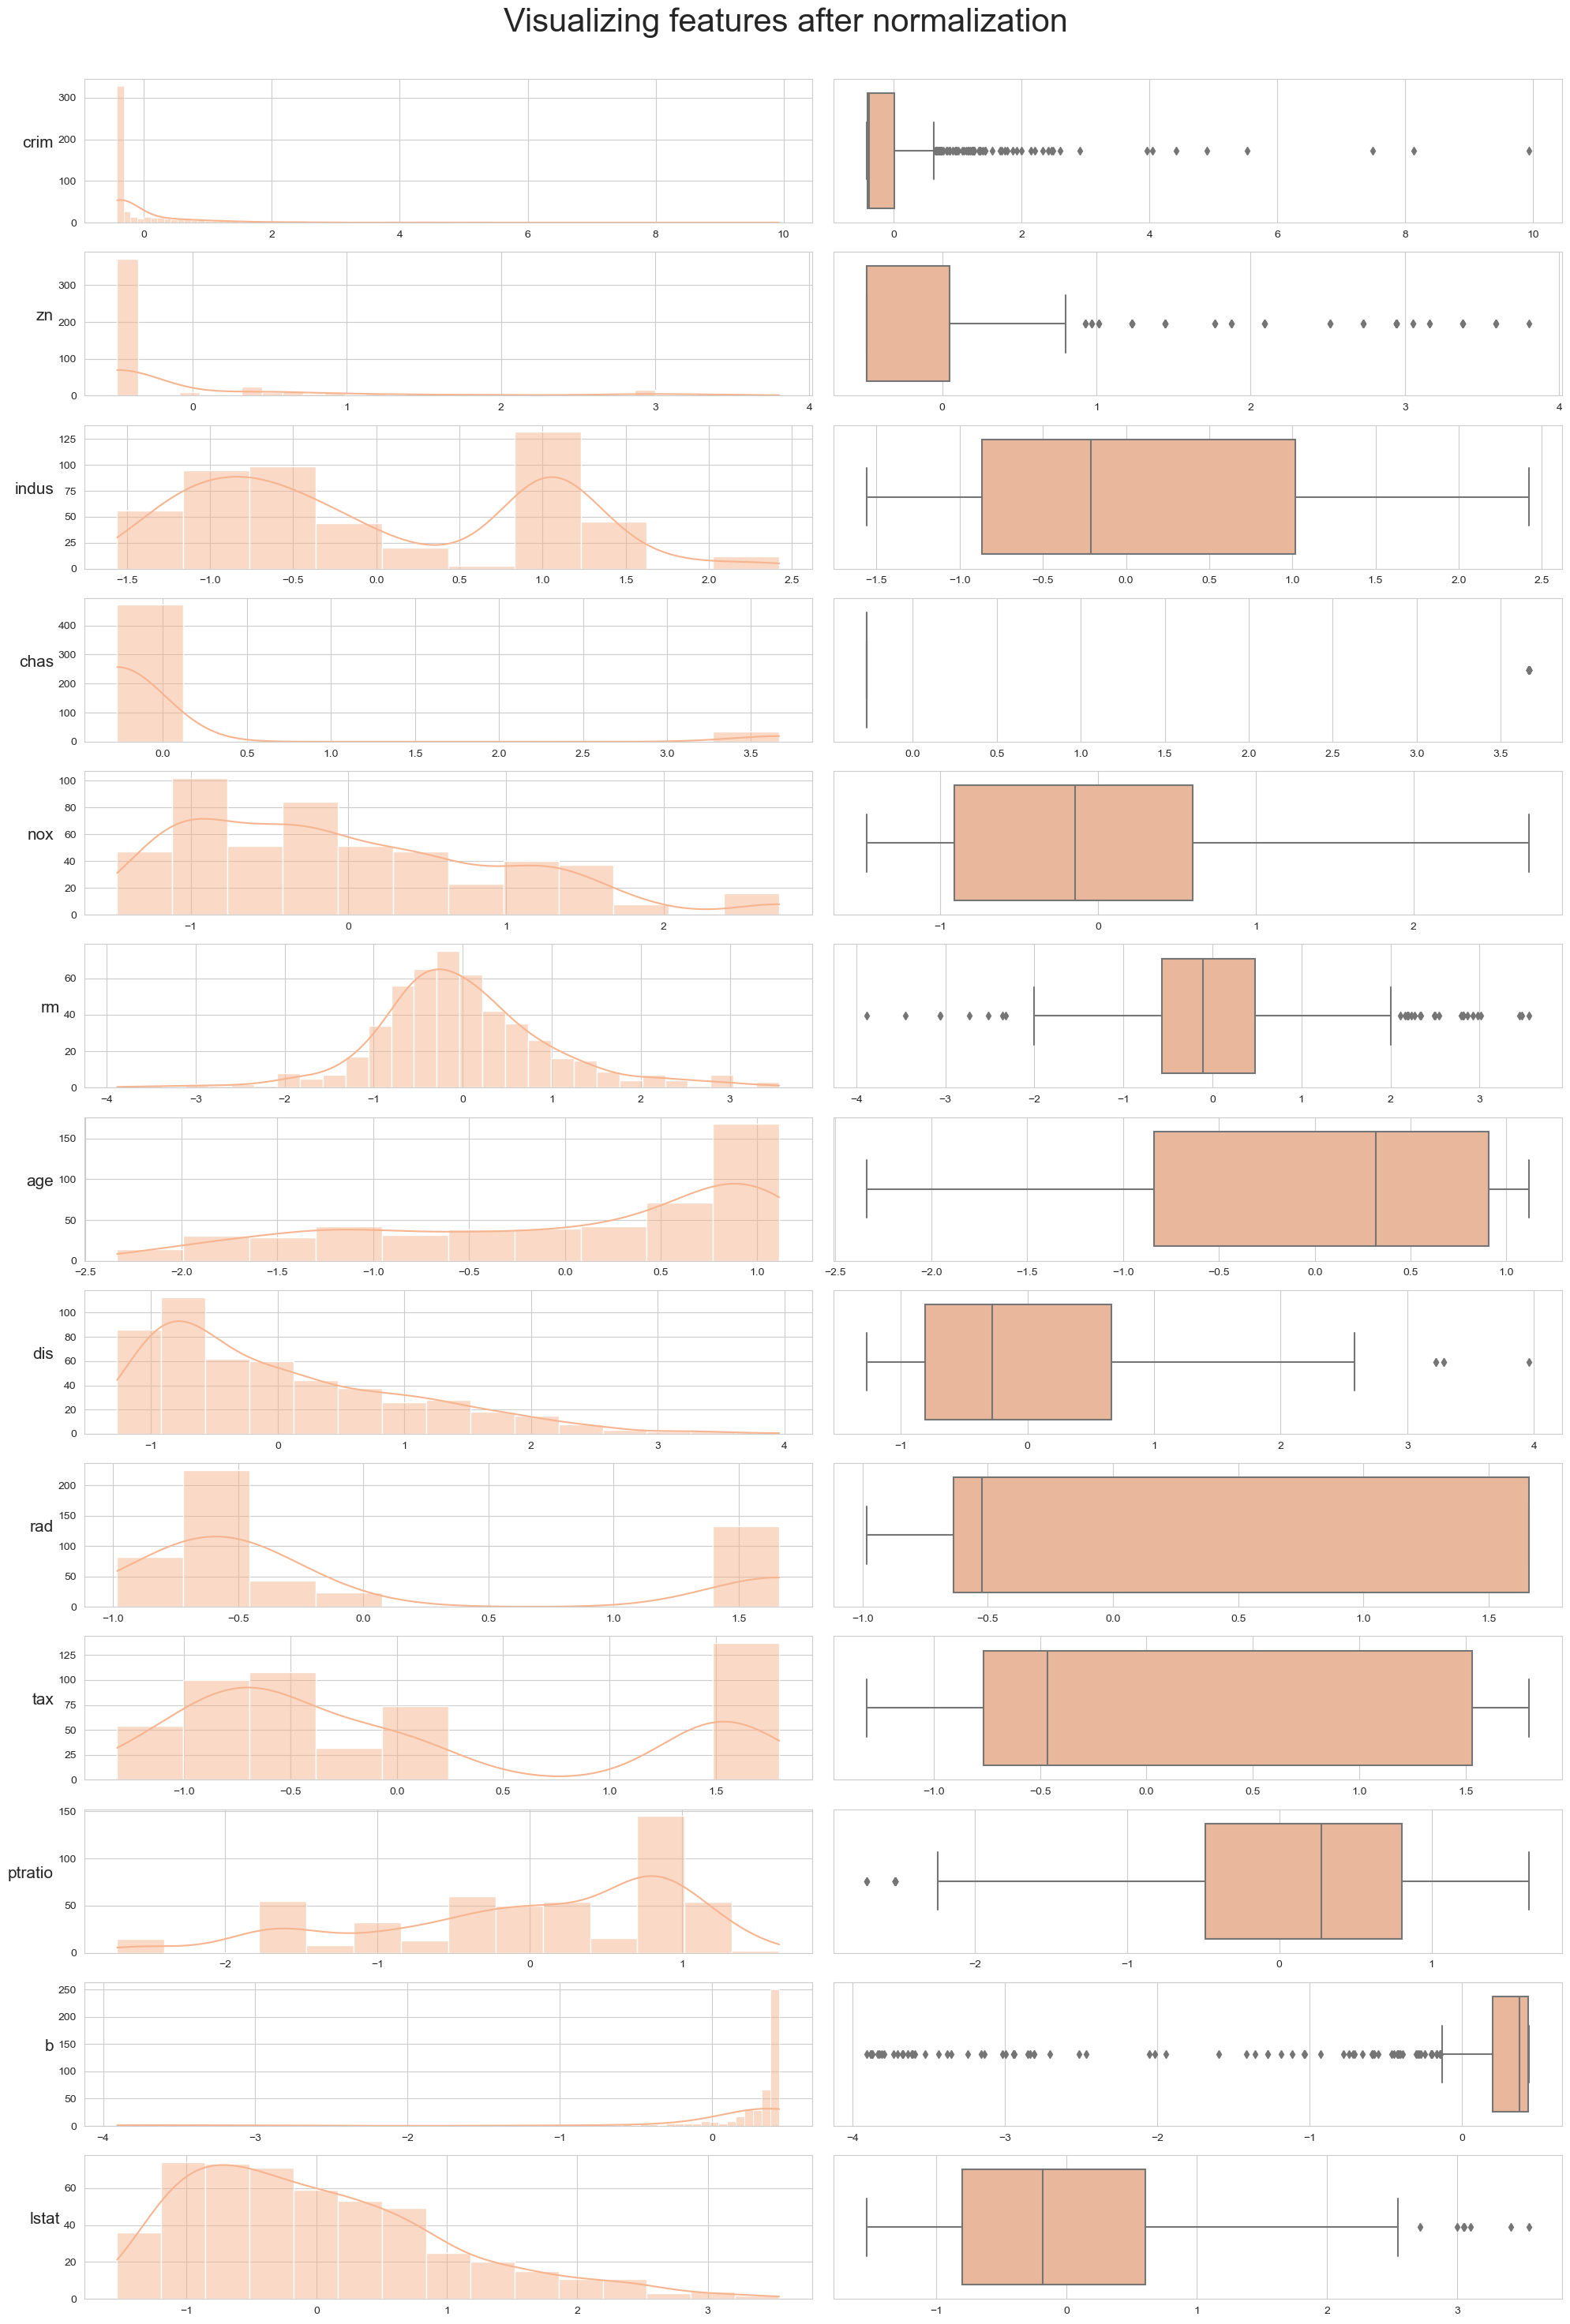

In [17]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(len(features), 2, figsize = (20, 30))

for index, i in enumerate(features):
    sns.histplot((df1[i]), ax = ax[index,0], kde = True)
    sns.boxplot((df1[i]), ax = ax[index,1])
    ax[index, 0].set_ylabel(i, fontsize = 15, rotation = 'horizontal', ha = 'right')
    ax[index, 0].set(xlabel = None)
    ax[index, 1].set(xlabel = None)

fig.tight_layout()
fig.subplots_adjust(top = 0.95)

plt.suptitle('Visualizing features after normalization', fontsize = 30)

> Because each columns has different unit. Therefore, the dataset is normalized. 

## Target

**Target Distribution**

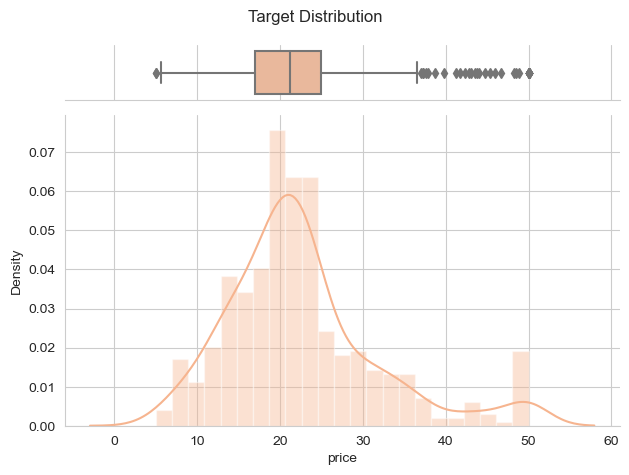

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})

sns.boxplot(df1['price'], ax = ax_box)
sns.distplot(df1['price'], ax = ax_hist)
ax_box.set(xlabel = None, yticks = [])
sns.despine(ax = ax_hist)
sns.despine(ax = ax_box, left=True)

plt.suptitle('Target Distribution')
plt.tight_layout()

**Target Normalization**

In [19]:
scaler = StandardScaler()
df1['price'] = scaler.fit_transform(df1['price'].values.reshape(-1,1))

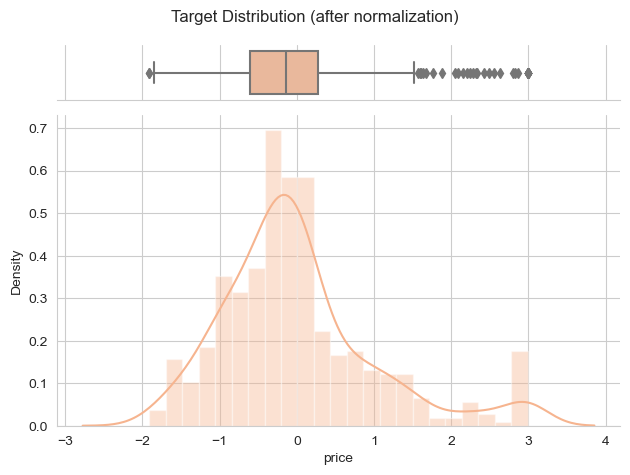

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})

sns.boxplot(df1['price'], ax = ax_box)
sns.distplot(df1['price'], ax = ax_hist)
ax_box.set(xlabel = None, yticks = [])
sns.despine(ax = ax_hist)
sns.despine(ax = ax_box, left=True)

plt.suptitle('Target Distribution (after normalization)')
plt.tight_layout()

<a id="2.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    2.3 Bivariate analysis
</p>
</div>

**Distribution**

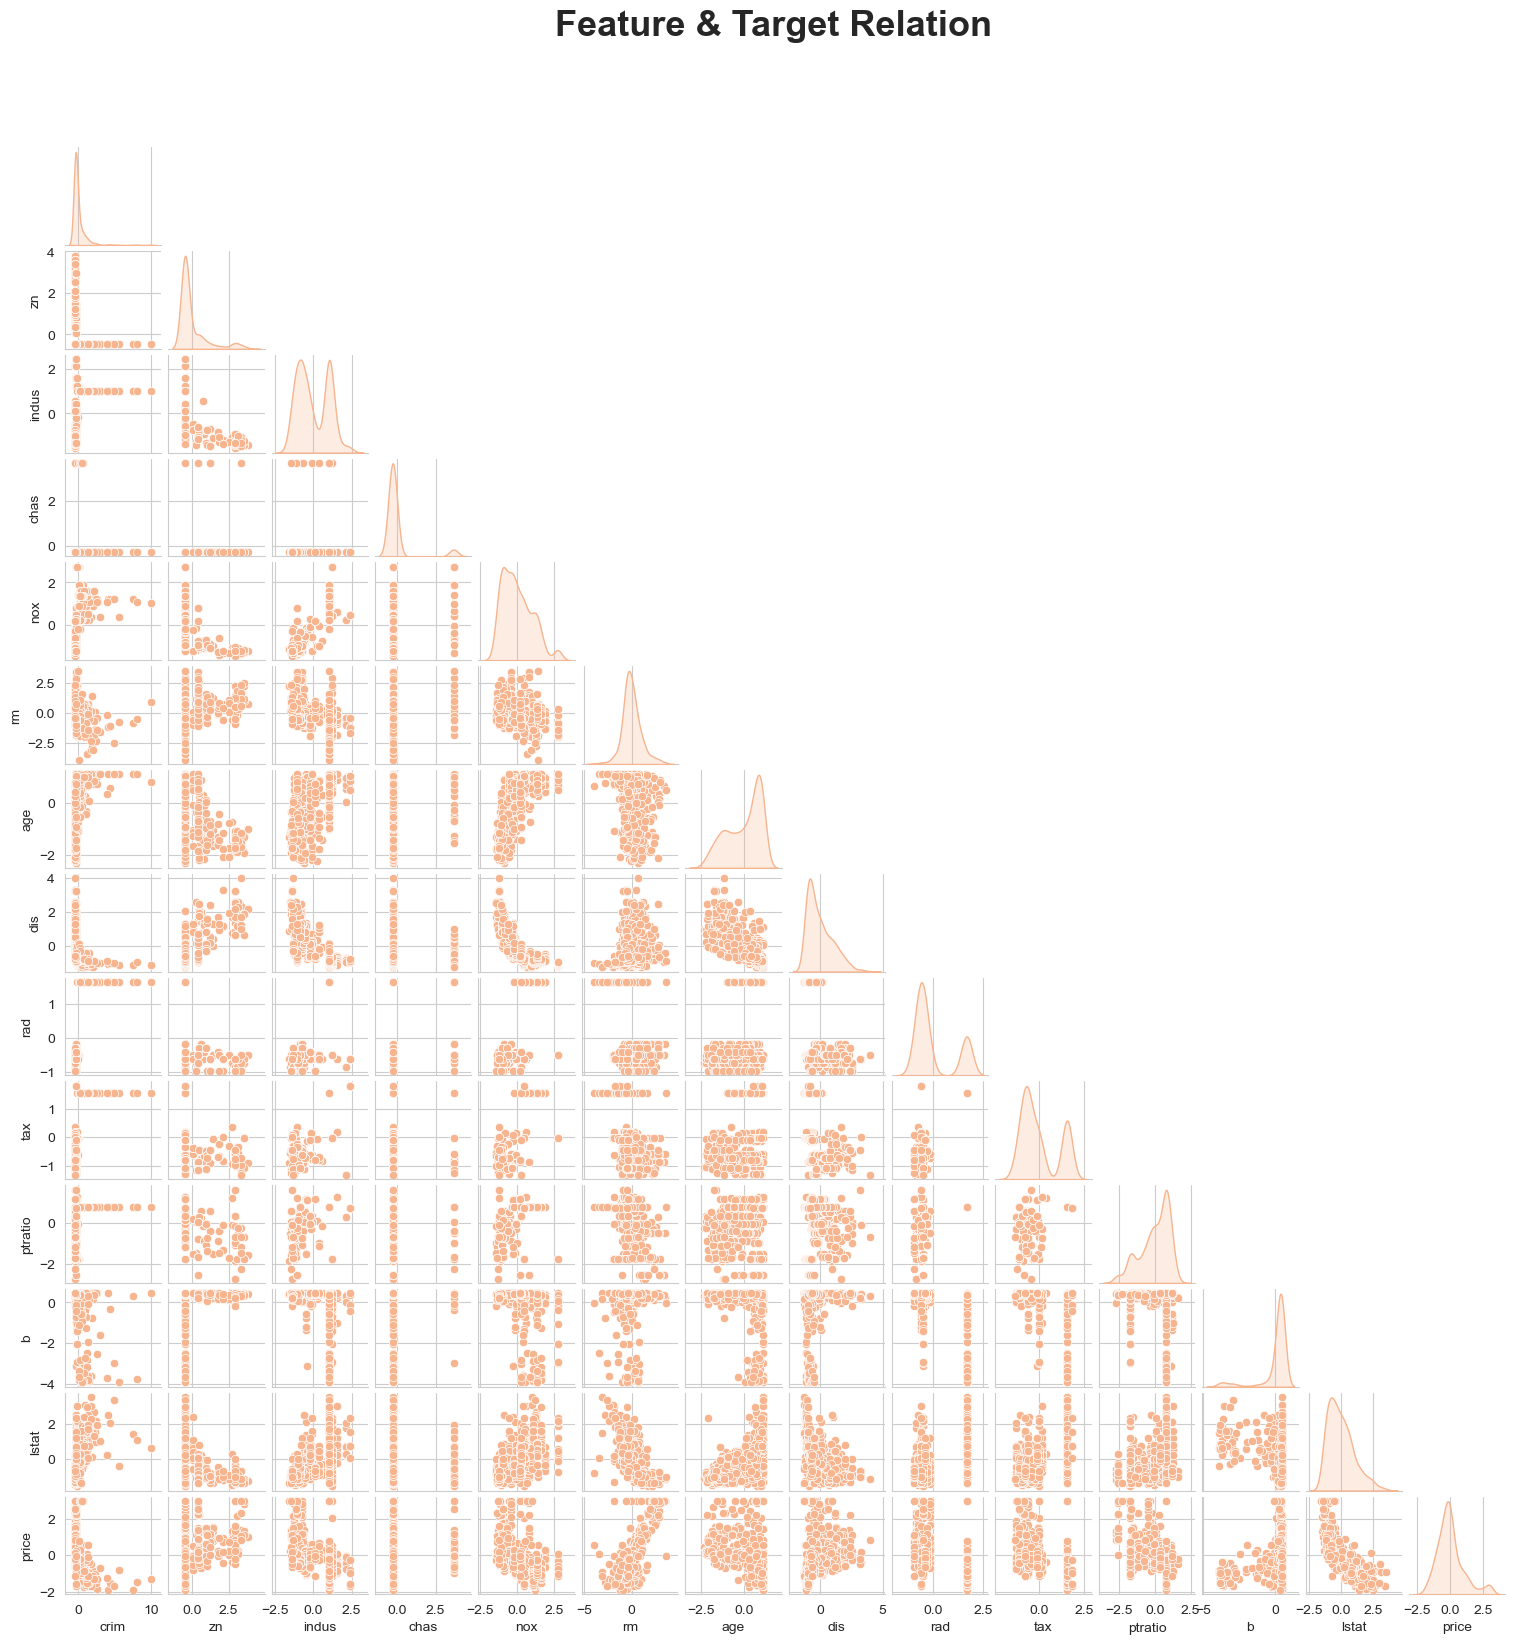

In [21]:
ax = sns.pairplot(df1, diag_kind = 'kde', kind = 'scatter', corner = True)
ax.fig.set_size_inches(15, 15)
ax.fig.suptitle('Feature & Target Relation', y = 1.08, size = 26, weight = 'bold')
fig.tight_layout()

> From the above chart, distributions of target & features (`price`) are shown in the diagonal line. Moreover, under the diagonal line is the scatter plots showing relationship between all variables of the model. The relation between 2 of any variables could be predicted (negative/positive/no correlation). But for clarification, correlation coefficients will be shown in the correlation chart below.   

**Correlation**

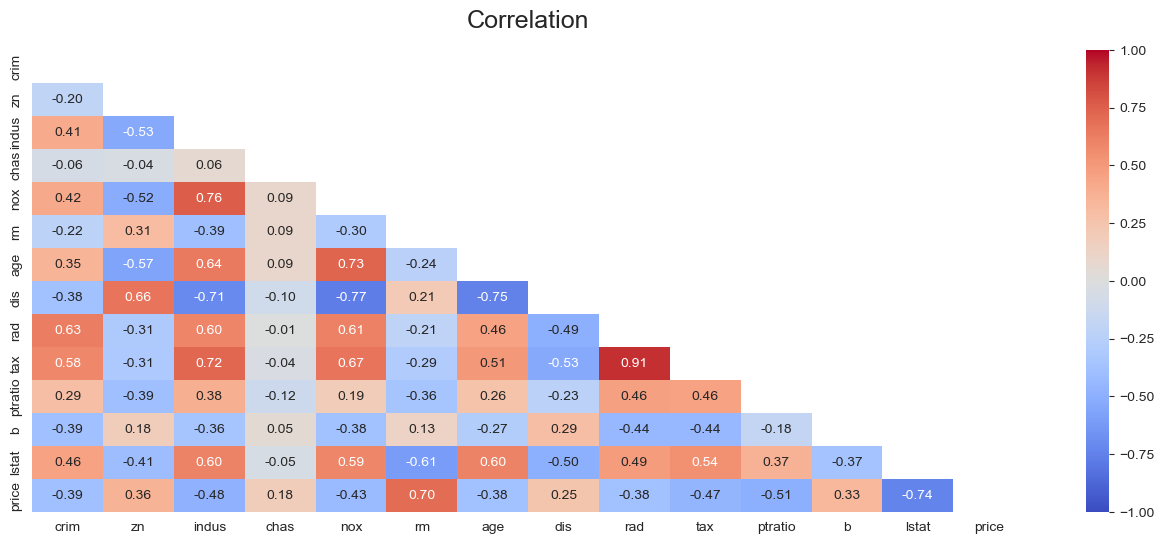

In [22]:
plt.figure(figsize = (16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype = np.bool))

heatmap = sns.heatmap(df1.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm', fmt = '.2f')

heatmap.set_title('Correlation', fontdict = {'fontsize': 18}, pad = 16)

fig.tight_layout()

From correlation matrix, these following hypothesis could be made:
> * **rm, lstat**, followed by **indus, nox, tax, ptratio** have high correlation score with **price**, which might have help explain and predict **price**
> * **tax** has high correlation score with  **rad**, which isn't good and could be multicollinearity 

In [23]:
df1.to_csv('boston_house_price_v01.csv')

<a id="3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          3. Model Selection
</p>
</div>

[Return Table of Contents](#Table)

**Split dataset**

In [24]:
# slipt
from sklearn.model_selection import train_test_split, KFold
# metric
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV
# model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [25]:
x = df1.drop(['price'], axis = 1)
y = df1['price']
print(f'X shape: {x.shape}, Y shape: {y.shape}')

X shape: (506, 13), Y shape: (506,)


In [26]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 42)
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (354, 13), y_train shape: (354,)
x_test shape: (152, 13), y_test shape: (152,)


<a id="3.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.1 Linear Regression
</p>
</div>

In [27]:
linear = LinearRegression()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

linear_score = cross_validate(
    linear, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [28]:
linear_score = pd.DataFrame(linear_score)
linear_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.042862    0.003226                         -0.712275  0.428374
1  0.042862    0.003226                         -0.623076  0.749919
2  0.002990    0.001993                         -0.457811  0.786068
3  0.002990    0.001995                         -0.498954  0.775090
4  0.002994    0.001528                         -0.451803  0.660574

In [29]:
dict_r2 = {}
dict_r2['linear'] = linear_score['test_r2'].to_numpy()

dict_rmse = {}
dict_rmse['linear'] = linear_score['test_neg_root_mean_squared_error'].to_numpy() 

In [30]:
r2 = linear_score['test_r2']
rmse = - linear_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.68 (+/- 0.15)
RMSE = 0.55 (+/- 0.11)


> With the above result, the explain ability of linear model (**R2 = 68%**) isn't impressive. 

> Therefore, Ridge, Lasso, ElasticNet (Linear Regression Models with Regularization Term) are be used to improve the result. The evaluation is based on the comparison of RMSE, R2 and MAE between these models.

<a id="3.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.2 Ridge Regression
</p>
</div>

In [31]:
ridge = Ridge()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

ridge_score = cross_validate(
    ridge, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [32]:
ridge_score = pd.DataFrame(ridge_score)
ridge_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.014040    0.001992                         -0.712538  0.427951
1  0.014040    0.001992                         -0.623535  0.749550
2  0.002795    0.001557                         -0.457446  0.786409
3  0.001904    0.001562                         -0.497871  0.776065
4  0.002852    0.001739                         -0.450378  0.662712

In [33]:
dict_r2['ridge'] = ridge_score['test_r2'].to_numpy()

dict_rmse['ridge'] = ridge_score['test_neg_root_mean_squared_error'].to_numpy() 

In [34]:
r2 = ridge_score['test_r2']
rmse = - ridge_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.68 (+/- 0.15)
RMSE = 0.55 (+/- 0.12)


> As we could see, the result of Ridge Regression is not better than Linear Regression.

<a id="3.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.3 Lasso Regression
</p>
</div>

In [35]:
lasso = Lasso()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

lasso_score = cross_validate(
    lasso, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [36]:
lasso_score = pd.DataFrame(lasso_score)
lasso_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.005032    0.001993                         -0.943013 -0.001965
1  0.004611    0.001993                         -1.252869 -0.011139
2  0.001787    0.001492                         -1.025021 -0.072431
3  0.002115    0.001820                         -1.061566 -0.018080
4  0.001473    0.002858                         -0.777028 -0.003969

In [37]:
dict_r2['lasso'] = lasso_score['test_r2'].to_numpy()

dict_rmse['lasso'] = lasso_score['test_neg_root_mean_squared_error'].to_numpy() 

In [38]:
r2 = lasso_score['test_r2']
rmse = - lasso_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = -0.02 (+/- 0.03)
RMSE = 1.01 (+/- 0.17)


> Lasso Regression isn't have better result than Linear Regression. So ElasticNet Regression (the regularization term of ElasticNet is the combination of regularization term of Lasso & Rigde) is be used.

<a id="3.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.4 Elastic Net Regression
</p>
</div>

In [39]:
elastic = ElasticNet()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

elastic_score = cross_validate(
    elastic, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [40]:
elastic_score = pd.DataFrame(elastic_score)
elastic_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.001869    0.003487                         -0.813206  0.254894
1  0.002722    0.003982                         -1.124592  0.185316
2  0.002410    0.002306                         -0.864490  0.237176
3  0.001885    0.002115                         -0.907810  0.255477
4  0.001508    0.001648                         -0.616950  0.367084

In [41]:
dict_r2['elastic'] = elastic_score['test_r2'].to_numpy()

dict_rmse['elastic'] = elastic_score['test_neg_root_mean_squared_error'].to_numpy() 

In [42]:
r2 = elastic_score['test_r2']
rmse = - elastic_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.26 (+/- 0.07)
RMSE = 0.87 (+/- 0.18)


> After adding Regular term, the model score isn't better. Untill now, Linear Regression is still the best option. Next, other regression models are be used. 

<a id="3.5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.5 Decision Tree Regression
</p>
</div>

In [43]:
tree = DecisionTreeRegressor(random_state = 42)

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

tree_score = cross_validate(
    tree, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [44]:
tree_score = pd.DataFrame(tree_score)
tree_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.005779    0.002608                         -0.651354  0.521974
1  0.006401    0.002936                         -0.539261  0.812674
2  0.004111    0.001994                         -0.424134  0.816384
3  0.003986    0.001993                         -0.557219  0.719495
4  0.002720    0.000996                         -0.632147  0.335519

In [45]:
dict_r2['tree'] = tree_score['test_r2'].to_numpy()

dict_rmse['tree'] = tree_score['test_neg_root_mean_squared_error'].to_numpy() 

In [46]:
r2 = tree_score['test_r2']
rmse = - tree_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.64 (+/- 0.21)
RMSE = 0.56 (+/- 0.09)


> Linear Regression still gives better performance.

<a id="3.6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.6 Random Forest Regression
</p>
</div>

In [47]:
forest = RandomForestRegressor(random_state = 42)

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

forest_score = cross_validate(
    forest, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [48]:
forest_score = pd.DataFrame(forest_score)
forest_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.169274    0.010981                         -0.523076  0.691718
1  0.173793    0.008827                         -0.398554  0.897677
2  0.175581    0.009967                         -0.339556  0.882313
3  0.182036    0.006976                         -0.440611  0.824612
4  0.191359    0.006977                         -0.333263  0.815319

In [49]:
dict_r2['forest'] = forest_score['test_r2'].to_numpy()

dict_rmse['forest'] = forest_score['test_neg_root_mean_squared_error'].to_numpy() 

In [50]:
r2 = forest_score['test_r2']
rmse = - forest_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.82 (+/- 0.08)
RMSE = 0.41 (+/- 0.08)


> Random Forest Regression improves model scores. (Both R2 & RMSE is better than Linear Model).

<a id="3.7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.7 Support Vector Regression
</p>
</div>

In [51]:
svr = SVR()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

svr_score = cross_validate(
    svr, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [52]:
svr_score = pd.DataFrame(svr_score)
svr_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.021926    0.004987                         -0.577063  0.624799
1  0.019932    0.003988                         -0.597689  0.769882
2  0.008967    0.004983                         -0.397635  0.838611
3  0.010959    0.003986                         -0.389231  0.863132
4  0.007972    0.004984                         -0.247258  0.898340

In [53]:
dict_r2['svr'] = svr_score['test_r2'].to_numpy()

dict_rmse['svr'] = svr_score['test_neg_root_mean_squared_error'].to_numpy() 

In [54]:
r2 = svr_score['test_r2']
rmse = - svr_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.80 (+/- 0.11)
RMSE = 0.44 (+/- 0.15)


> Random Forest is better than SVR (based on comparision of R2, RMSE).

<a id="3.8"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.8 XGBoost Regression
</p>
</div>

In [55]:
xgb = XGBRegressor()

kfold = KFold(random_state = 42, shuffle = True)

scoring = ['neg_root_mean_squared_error', 'r2'] 

xgb_score = cross_validate(
    xgb, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring)

In [56]:
xgb_score = pd.DataFrame(xgb_score)
xgb_score

fit_time  score_time  test_neg_root_mean_squared_error   test_r2
0  0.117607    0.008968                         -0.504586  0.713128
1  0.176409    0.008970                         -0.375242  0.909297
2  0.215279    0.005981                         -0.312798  0.900131
3  0.170430    0.003986                         -0.421830  0.839246
4  0.070763    0.002990                         -0.357993  0.786893

In [57]:
dict_r2['xgb'] = xgb_score['test_r2'].to_numpy()

dict_rmse['xgb'] = xgb_score['test_neg_root_mean_squared_error'].to_numpy() 

In [58]:
r2 = xgb_score['test_r2']
rmse = - xgb_score['test_neg_root_mean_squared_error']

print(f'R2 = {r2.mean():.2f} (+/- {r2.std():.2f})')
print(f'RMSE = {rmse.mean():.2f} (+/- {rmse.std():.2f})')

R2 = 0.83 (+/- 0.08)
RMSE = 0.39 (+/- 0.07)


> After comparing, XGBoost is better than Random Forest.

<a id="3.9"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#eaa299;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
    3.9 Comparison
</p>
</div>

In [59]:
mod = {linear: 'Linear Regression', ridge: 'Ridge Regression', lasso: 'Lasso Regression', elastic: 'Elastic Net Regression',
      tree: 'Decision Tree Regression', forest: 'Random Forest Regression', svr: 'Support Vector Regression', xgb: 'XGBoost Regression'}
test_R2_average = []
test_R2_std = []
test_neg_RMSE_average = []
test_neg_RMSE_std = []

model = mod.keys()
scoring = ['r2', 'neg_root_mean_squared_error'] 
kfold = KFold(shuffle = True, random_state = 42)

for m in model:
    test_R2_average.append(cross_val_score(m, x_train, y_train, scoring = scoring[0], cv = kfold, n_jobs = 2).mean())
    test_R2_std.append(cross_val_score(m, x_train, y_train, scoring = scoring[0], cv = kfold, n_jobs = 2).std())
    test_neg_RMSE_average.append(cross_val_score(m, x_train, y_train, scoring = scoring[1], cv = kfold, n_jobs = 2).mean())
    test_neg_RMSE_std.append(cross_val_score(m, x_train, y_train, scoring = scoring[1], cv = kfold, n_jobs = 2).std())

In [60]:
model_df = pd.DataFrame(list(zip(mod.values(), test_R2_average, test_R2_std, test_neg_RMSE_average, test_neg_RMSE_std)),
                        columns = ['model','test_R2_average', 'test_R2_std', 'test_neg_RMSE_average', 'test_neg_RMSE_std'])

model_df.sort_values(by = ['test_neg_RMSE_average', 'test_R2_average'], ascending = False)

model  test_R2_average  test_R2_std  \
7         XGBoost Regression         0.829739     0.073224   
5   Random Forest Regression         0.822328     0.072648   
6  Support Vector Regression         0.798953     0.096689   
1           Ridge Regression         0.680537     0.133577   
0          Linear Regression         0.680005     0.133322   
4   Decision Tree Regression         0.641209     0.186482   
3     Elastic Net Regression         0.259989     0.059350   
2           Lasso Regression        -0.021517     0.026085   

   test_neg_RMSE_average  test_neg_RMSE_std  
7              -0.394490           0.065184  
5              -0.407012           0.070229  
6              -0.441775           0.130505  
1              -0.548354           0.102976  
0              -0.548784           0.102384  
4              -0.560823           0.080554  
3              -0.865409           0.163360  
2              -1.011899           0.155316

> From the above table, **XGB** might be the most suitable model. But for information, the model performance (evaluated based on r2, RMSE) through 5 times fold of cross-validation is visualized. 

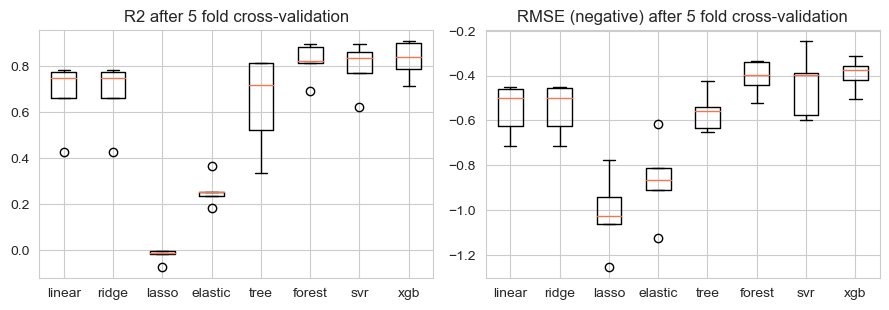

In [61]:
fig, axs = plt.subplots(1, 2, figsize = (9,3))
axs[0].boxplot(dict_r2.values())
axs[0].set_xticklabels(dict_r2.keys())
axs[0].set_title('R2 after 5 fold cross-validation')

axs[1].boxplot(dict_rmse.values())
axs[1].set_xticklabels(dict_rmse.keys())
axs[1].set_title('RMSE (negative) after 5 fold cross-validation')

fig.tight_layout()
fig.subplots_adjust(top = 0.95)

> **XGBoost Regression** is selected as the Final Model (highest R2 & RMSE (negative) and not too high standard deviation).

<a id="4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          4. Model Evaluation
</p>
</div>

[Return Table of Contents](#Table)

In [62]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [63]:
y_pred = model.predict(x_test)

R2 = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
result = [R2, RMSE]

print(f'R2 (test set) = {R2: .2f}')
print(f'MAE (test set) = {MAE: .2f}')
print(f'RMSE (test set) = {RMSE: .2f}')

R2 (test set) =  0.88
MAE (test set) =  0.10
RMSE (test set) =  0.32


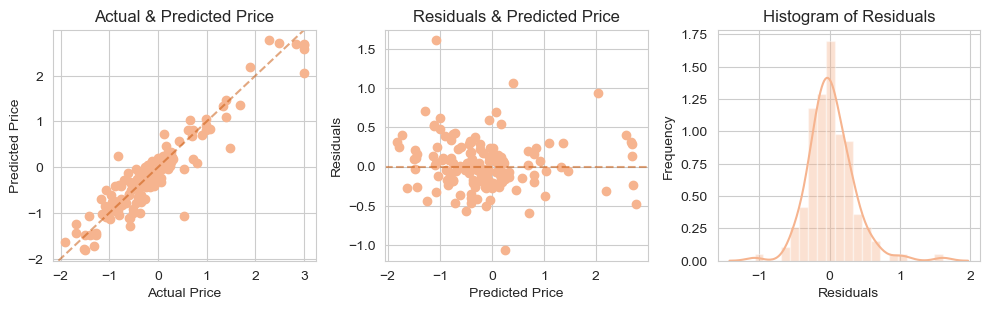

In [64]:
fig, axs = plt.subplots(1, 3, figsize = (10,3))
# Scatter plot (actual vs predict)
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
# 45-degree line
axs[0].axline((0, 0), slope = 1, linestyle = '--', color = "#C65102", alpha = 0.5)
axs[0].set_title('Actual & Predicted Price')

# Scatter plot (residual vs predict)
axs[1].scatter(y_pred, y_test - y_pred)
axs[1].set_xlabel('Predicted Price')
axs[1].set_ylabel('Residuals')
# Residual = 0 line
axs[1].axhline(y = 0, color = '#C65102', linestyle = '--', alpha = 0.5)
axs[1].set_title('Residuals & Predicted Price')

# Histogram plot (res)
sns.distplot(y_test - y_pred, ax = axs[2])
axs[2].set_xlabel('Residuals')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Residuals')

fig.tight_layout()
fig.subplots_adjust(top = 0.95)

> * The points in the left chart are quite close to the 45-degree line (x=y), which means that the Predicted Prices are fairly correct.
> * Residuals of Predicted Price in the middle chart are distributed quite near the line y = 0 and mainly fluctuated in the range of -5 to 5 unit, which means that residual range of model could be accepted. 
> * Residuals in the right chart is distributed normally and have highest frequency at 0, which means that there aren't much differences between actual and predicted values. 

<a id="5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          5. Hyperparamter Tuning
</p>
</div>

[Return Table of Contents](#Table)

**RandomizedSearchCV**

In [65]:
# Define the grid of hyperparameters to search
grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 10, 100]
    }

model = XGBRegressor()
kfold = KFold(shuffle = True, random_state = 42)
score = ['neg_root_mean_squared_error', 'r2']

# Set up the random search with 4-fold cross validation
rd = RandomizedSearchCV(model, grid, scoring = score, cv = kfold, n_jobs = 2, verbose = 5, refit = False)

rd_result = rd.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [66]:
rd_result_df = pd.DataFrame(rd_result.cv_results_)
rd_result_df.shape

(10, 25)

In [67]:
params = rd_result_df['params'].apply(pd.Series)

rd_result_df = rd_result_df.join(params)
rd_result_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.061752      0.014603         0.004461        0.001129   
1       0.095173      0.017374         0.003086        0.001570   
2       0.047856      0.008146         0.003300        0.001731   
3       0.056054      0.002641         0.003448        0.000380   
4       0.046311      0.001660         0.003372        0.000527   

  param_n_estimators param_min_child_weight param_max_depth  \
0                150                    100               7   
1                200                      1               3   
2                150                    100               5   
3                100                     10               7   
4                100                     10               5   

  param_learning_rate                                             params  \
0                0.15  {'n_estimators': 150, 'min_child_weight': 100,...   
1                 0.1  {'n_estimators': 200, 'min_child_weight': 1, '...   
2                 0.1  {'n_estimators': 150, 'min_child_weight': 100,...   
3                 0.1  {'n_estimators': 100, 'min_child_weight': 10, ...   
4                0.15  {'n_estimators': 100, 'min_child_weight': 10, ...   

   split0_test_neg_root_mean_squared_error  ...  split2_test_r2  \
0                                -0.743564  ...        0.632228   
1                                -0.506163  ...        0.913508   
2                                -0.742222  ...        0.623271   
3                                -0.507471  ...        0.909122   
4                                -0.507220  ...        0.908219   

   split3_test_r2  split4_test_r2  mean_test_r2  std_test_r2  rank_test_r2  \
0        0.700874        0.479999      0.560243     0.116224             8   
1        0.785026        0.838615      0.831762     0.076929             3   
2        0.697594        0.486572      0.558660     0.112375            10   
3        0.801612        0.815758      0.830179     0.075972             4   
4        0.802454        0.820939      0.829848     0.073940             5   

   n_estimators  min_child_weight  max_depth  learning_rate  
0         150.0             100.0        7.0           0.15  
1         200.0               1.0        3.0           0.10  
2         150.0             100.0        5.0           0.10  
3         100.0              10.0        7.0           0.10  
4         100.0              10.0        5.0           0.15  

[5 rows x 29 columns]

In [68]:
mean_cols = [i for i in rd_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in rd_result_df.columns if i.startswith('rank')]
report = rd_result_df[['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', *mean_cols, *rank_cols]].dropna()
report.sort_values(by = ['rank_test_r2'])

n_estimators  max_depth  learning_rate  min_child_weight  mean_fit_time  \
6         200.0        5.0           0.15               1.0       0.098434   
9         200.0        5.0           0.10               1.0       0.097219   
1         200.0        3.0           0.10               1.0       0.095173   
3         100.0        7.0           0.10              10.0       0.056054   
4         100.0        5.0           0.15              10.0       0.046311   
5         150.0        7.0           0.05               1.0       0.098041   
8         150.0       10.0           0.05               1.0       0.132023   
0         150.0        7.0           0.15             100.0       0.061752   
7         100.0        5.0           0.15             100.0       0.033450   
2         150.0        5.0           0.10             100.0       0.047856   

   mean_score_time  mean_test_neg_root_mean_squared_error  mean_test_r2  \
6         0.004027                              -0.389574      0.832934   
9         0.003579                              -0.390627      0.832635   
1         0.003086                              -0.393940      0.831762   
3         0.003448                              -0.394303      0.830179   
4         0.003372                              -0.396357      0.829848   
5         0.003701                              -0.401090      0.822633   
8         0.003689                              -0.414839      0.809730   
0         0.004461                              -0.651097      0.560243   
7         0.003831                              -0.651936      0.560199   
2         0.003300                              -0.653098      0.558660   

   rank_test_neg_root_mean_squared_error  rank_test_r2  
6                                      1             1  
9                                      2             2  
1                                      3             3  
3                                      4             4  
4                                      5             5  
5                                      6             6  
8                                      7             7  
0                                      8             8  
7                                      9             9  
2                                     10            10

In [69]:
import plotly.express as px

fig = px.scatter(report, y = 'mean_test_r2', x = 'mean_test_neg_root_mean_squared_error', width = 950, height = 400)
fig.update_traces(marker = dict(color = '#FFE4B5', size = 20, line = dict(width = 2, color = '#FFA500')), 
                  selector = dict(mode = 'markers'))
fig.update_layout(template = 'plotly_white', title = 'Visualization of R2 & RMSE(neg)')

fig.show()

In [70]:
# The best combination of RandomizedSearchCV is:
n_estimators = 100
max_depth = 7
learning_rate = 0.20
min_child_weight = 10

random = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth,
                       learning_rate = learning_rate, min_child_weight = min_child_weight)
random.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [71]:
y_pred = random.predict(x_test)

R2 = metrics.r2_score(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

result_random = [R2, RMSE]
print(result_random)

[0.8517898198388423, 0.3616877404249366]


**GridSearchCV**

In [72]:
# Define the grid of hyperparameters to search
grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 10, 100]
    }

model = XGBRegressor()
kfold = KFold(shuffle = True, random_state = 42)
score = ['neg_root_mean_squared_error', 'r2']

# Set up the random search with 4-fold cross validation
gr = GridSearchCV(model, grid, scoring = score, cv = kfold, n_jobs = 2, verbose = 5, refit = False)

gr_result = gr.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [73]:
gr_result_df = pd.DataFrame(gr_result.cv_results_)
gr_result_df.shape

(144, 25)

In [74]:
params = gr_result_df['params'].apply(pd.Series)

gr_result_df = gr_result_df.join(params)
gr_result_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.050015      0.007592         0.004280        0.002105   
1       0.072707      0.012710         0.003956        0.000560   
2       0.096516      0.011082         0.003764        0.000397   
3       0.045151      0.005556         0.003822        0.000544   
4       0.060178      0.003531         0.003893        0.000496   

  param_learning_rate param_max_depth param_min_child_weight  \
0                0.05               3                      1   
1                0.05               3                      1   
2                0.05               3                      1   
3                0.05               3                     10   
4                0.05               3                     10   

  param_n_estimators                                             params  \
0                100  {'learning_rate': 0.05, 'max_depth': 3, 'min_c...   
1                150  {'learning_rate': 0.05, 'max_depth': 3, 'min_c...   
2                200  {'learning_rate': 0.05, 'max_depth': 3, 'min_c...   
3                100  {'learning_rate': 0.05, 'max_depth': 3, 'min_c...   
4                150  {'learning_rate': 0.05, 'max_depth': 3, 'min_c...   

   split0_test_neg_root_mean_squared_error  ...  split2_test_r2  \
0                                -0.510935  ...        0.905548   
1                                -0.509217  ...        0.917497   
2                                -0.509158  ...        0.920641   
3                                -0.517605  ...        0.895632   
4                                -0.508298  ...        0.907761   

   split3_test_r2  split4_test_r2  mean_test_r2  std_test_r2  rank_test_r2  \
0        0.790877        0.830368      0.827967     0.075609            57   
1        0.794882        0.834034      0.832872     0.077724            19   
2        0.795552        0.835283      0.833791     0.078227             9   
3        0.801950        0.826064      0.825684     0.075205            76   
4        0.807752        0.831452      0.833851     0.074955             8   

   learning_rate  max_depth  min_child_weight  n_estimators  
0           0.05        3.0               1.0         100.0  
1           0.05        3.0               1.0         150.0  
2           0.05        3.0               1.0         200.0  
3           0.05        3.0              10.0         100.0  
4           0.05        3.0              10.0         150.0  

[5 rows x 29 columns]

In [75]:
mean_cols = [i for i in rd_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in rd_result_df.columns if i.startswith('rank')]
report_1 = gr_result_df[['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', *mean_cols, *rank_cols]].dropna()
report_1.sort_values(by = ['rank_test_r2'])

n_estimators  max_depth  learning_rate  min_child_weight  mean_fit_time  \
11         200.0        5.0           0.05               1.0       0.109498   
10         150.0        5.0           0.05               1.0       0.089065   
93         100.0        7.0           0.15              10.0       0.090205   
5          200.0        3.0           0.05              10.0       0.083157   
94         150.0        7.0           0.15              10.0       0.131106   
..           ...        ...            ...               ...            ...   
25         150.0        7.0           0.05             100.0       0.038124   
24         100.0        7.0           0.05             100.0       0.027106   
15         100.0        5.0           0.05             100.0       0.040885   
6          100.0        3.0           0.05             100.0       0.030605   
33         100.0       10.0           0.05             100.0       0.027507   

    mean_score_time  mean_test_neg_root_mean_squared_error  mean_test_r2  \
11         0.004530                              -0.387158      0.836739   
10         0.003503                              -0.388216      0.836040   
93         0.005822                              -0.388910      0.835111   
5          0.004133                              -0.389432      0.834964   
94         0.004914                              -0.390428      0.834105   
..              ...                                    ...           ...   
25         0.003690                              -0.660311      0.551660   
24         0.003397                              -0.668489      0.542579   
15         0.004169                              -0.668489      0.542579   
6          0.003682                              -0.668489      0.542579   
33         0.003388                              -0.668489      0.542579   

    rank_test_neg_root_mean_squared_error  rank_test_r2  
11                                      1             1  
10                                      2             2  
93                                      3             3  
5                                       5             4  
94                                     12             5  
..                                    ...           ...  
25                                    137           137  
24                                    141           141  
15                                    141           141  
6                                     141           141  
33                                    141           141  

[144 rows x 10 columns]

In [76]:
import plotly.express as px

fig = px.scatter(report_1, y = 'mean_test_r2', x = 'mean_test_neg_root_mean_squared_error', width = 950, height = 400)
fig.update_traces(marker = dict(color = '#FFE4B5', size = 20, line = dict(width = 2, color = '#FFA500')), 
                  selector = dict(mode = 'markers'))
fig.update_layout(template = 'plotly_white', title = 'Visualization of R2 & RMSE(neg)')

fig.show()

In [77]:
# The best combination of GridSearchCV is:
n_estimators = 200
max_depth = 5
learning_rate = 0.05
min_child_weight = 1

grid = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth,
                       learning_rate = learning_rate, min_child_weight = min_child_weight)
grid.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
y_pred = grid.predict(x_test)

R2 = metrics.r2_score(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

result_grid = [R2, RMSE]
print(result_grid)

[0.8861926085434654, 0.31694215415703647]


In [79]:
compare = pd.DataFrame(data = zip(result, result_random, result_grid), 
                       columns = ['Before Tuning', 'RandomizedSearchCV', 'GridSearchSV'])
compare = compare.rename(index = {0: 'R2', 1: 'RMSE'})
compare

Before Tuning  RandomizedSearchCV  GridSearchSV
R2         0.881171            0.851790      0.886193
RMSE       0.323859            0.361688      0.316942

In [80]:
compare.shape

(2, 3)

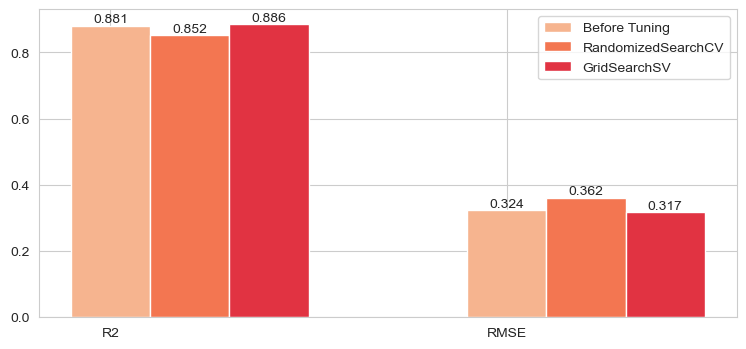

In [81]:
x = np.arange(compare.shape[0])
width = 0.2

plt.figure(figsize = (9, 4))

for i in range (compare.shape[1]):
    ax_i = plt.bar (x + i*width, compare.iloc[:,i], width)
    plt.bar_label(ax_i, np.round(compare.iloc[:, i], 3), fontsize = 10)

plt.xticks(x, compare.index)
plt.legend(compare.columns, loc = 'best')
plt.show()

> The hyperparamters after tuning by GridSearchCV is better than before tuning.

<a id="6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          6. Final Model
</p>
</div>

[Return Table of Contents](#Table)

In [82]:
n_estimators = 200
max_depth = 5
learning_rate = 0.05
min_child_weight = 1

final_model = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth,
                       learning_rate = learning_rate, min_child_weight = min_child_weight)
final_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
y_pred = final_model.predict(x_test)

R2 = metrics.r2_score(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'R2 = {R2: .2f}, RMSE = {RMSE: .2f}')

R2 =  0.89, RMSE =  0.32


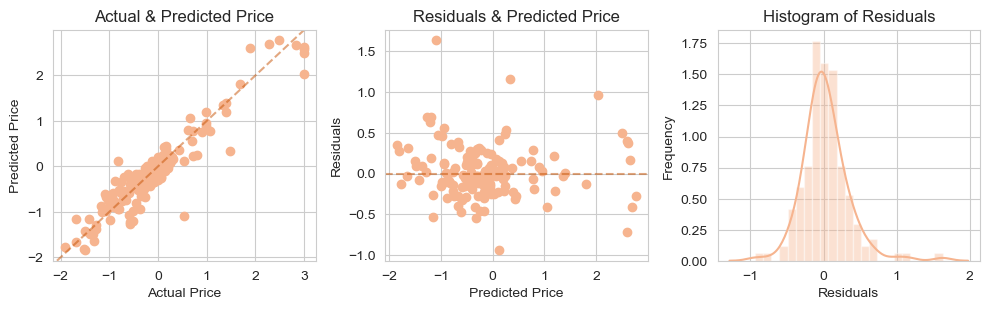

In [84]:
fig, axs = plt.subplots(1, 3, figsize = (10,3))
# Scatter plot (actual vs predict)
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
# 45-degree line
axs[0].axline((0, 0), slope = 1, linestyle = '--', color = "#C65102", alpha = 0.5)
axs[0].set_title('Actual & Predicted Price')

# Scatter plot (residual vs predict)
axs[1].scatter(y_pred, y_test - y_pred)
axs[1].set_xlabel('Predicted Price')
axs[1].set_ylabel('Residuals')
# Residual = 0 line
axs[1].axhline(y = 0, color = '#C65102', linestyle = '--', alpha = 0.5)
axs[1].set_title('Residuals & Predicted Price')

# Histogram plot (res)
sns.distplot(y_test - y_pred, ax = axs[2])
axs[2].set_xlabel('Residuals')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Residuals')

fig.tight_layout()
fig.subplots_adjust(top = 0.95)

**Feature Importance**

In [85]:
fi = pd.Series(final_model.feature_importances_, index = x_train.columns).sort_values(ascending = False)

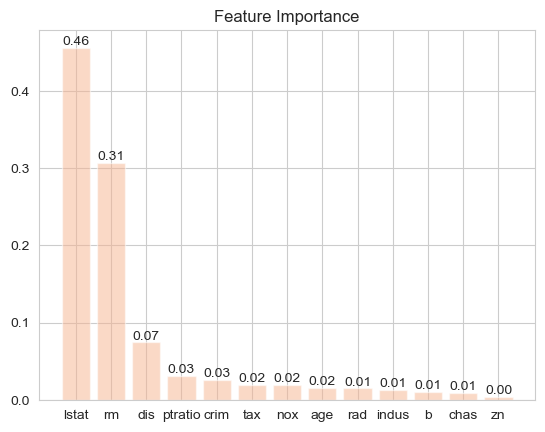

In [86]:
y_pos = np.arange(len(fi.index))
ax = plt.bar(y_pos, fi.values, align='center', alpha=0.5)
plt.xticks(y_pos, fi.index)
plt.title('Feature Importance')
plt.bar_label(ax, label_type='edge', fmt='%.2f')
plt.show()

> Top 3 features which have strongest impact on target are **`lsat`, `rm`, `dis`**.

<a id="7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#e07466;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          7. References
</p>
</div>

[Return Table of Contents](#Table)

1. [The Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)
2. [Boston house price prediction](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/notebook)
3. [A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook)